In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider
import numpy as np

from azure.quantum import Workspace
workspace = Workspace (
    subscription_id = "b1d7f7f8-743f-458e-b3a0-3e09734d716d",
    resource_group = "aq-hackathons",
    name = "aq-hackathon-01",
    location = "eastus"
)
provider = AzureQuantumProvider (
    resource_id = "/subscriptions/b1d7f7f8-743f-458e-b3a0-3e09734d716d/resourceGroups/aq-hackathons/providers/Microsoft.Quantum/Workspaces/aq-hackathon-01",
    location = "eastus"
)

print([backend.name() for backend in provider.backends()])

['ionq.qpu', 'ionq.simulator']


In [2]:
pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# trial to build ansatz and do inner product 
# the rotation array has Rz,Ry alternating for each qubit
# arranged qubit by qubit so it as an array of arrays 
# with inner array length of 2*repetitions and outer array of length n_qubits

def qfl_constructor(rot_array):
    n_qubits = len(rot_array)
    repetitions = int(len(rot_array[0])/2)
    circuit = QuantumCircuit(n_qubits,n_qubits)
    # we will have two angles per repetition per qubit
    for j in np.arange(0,2*repetitions,2):
        for i in range(n_qubits):
            circuit.rz(phi=rot_array[i][j], qubit=i)    
    
        for i in range(n_qubits):
            circuit.ry(theta=rot_array[i][j+1], qubit=i)

        circuit.barrier()
    
        for i in np.arange(1,n_qubits,2):
            circuit.cx(control_qubit=i-1, target_qubit=i)
    
        for i in np.arange(2,n_qubits,2):
            circuit.cx(control_qubit=i-1, target_qubit=i)
    

    return circuit

# this function spits out the combined circuit based on arrays specifying the rotation gates


def qfl_combined_constructor(rot_array_first, rot_array_second):
    circuit_first = qfl_constructor(rot_array_first)
    circuit_second = qfl_constructor(rot_array_second)
    inverse_circuit_second = circuit_second.inverse()
    circuit_combined = circuit_first.compose(inverse_circuit_second)
    # measure all the qubits at the end to get probability of getting 0000...00 
    circuit_combined.measure_all()
    return circuit_combined



In [4]:
arr_proto1 = [[1.183379769325256348e+00, 0.000000000000000000e+00, 1.172953367233276367e+00, 9.084763526916503906e-01],
[1.155265212059020996e+00, 9.507805109024047852e-01, 1.476372957229614258e+00, 0.000000000000000000e+00],
[1.390024542808532715e+00, 1.220489263534545898e+00, 8.038414120674133301e-01, 0.000000000000000000e+00],
[1.001330494880676270e+00, 1.006878376007080078e+00, 0.000000000000000000e+00, 0.000000000000000000e+00],
[0.000000000000000000e+00, 0.000000000000000000e+00, 0.000000000000000000e+00, 0.000000000000000000e+00],
[0.000000000000000000e+00, 1.154369831085205078e+00, 0.000000000000000000e+00, 0.000000000000000000e+00],
[8.966066241264343262e-01, 1.039488673210144043e+00, 1.118899583816528320e+00, 1.277834296226501465e+00],
[0.000000000000000000e+00, 9.505247473716735840e-01, 0.000000000000000000e+00, 3.163425251841545105e-02],
[0.000000000000000000e+00, 0.000000000000000000e+00, 0.000000000000000000e+00, 0.000000000000000000e+00],
[0.000000000000000000e+00, 7.990432977676391602e-01, 1.802779555320739746e+00, 6.087118387222290039e-01]]


In [5]:
arr_z1 = [[1.092189669609069824e+00, 0.000000000000000000e+00, 1.086921691894531250e+00, 9.078866243362426758e-01],
[1.067000031471252441e+00, 9.295142889022827148e-01, 1.350007414817810059e+00, 0.000000000000000000e+00],
[1.448413014411926270e+00, 1.203107476234436035e+00, 8.633031249046325684e-01, 0.000000000000000000e+00],
[1.002128005027770996e+00, 1.006047964096069336e+00, 0.000000000000000000e+00, 0.000000000000000000e+00],
[0.000000000000000000e+00, 0.000000000000000000e+00, 0.000000000000000000e+00, 0.000000000000000000e+00],
[0.000000000000000000e+00, 1.075054645538330078e+00, 0.000000000000000000e+00, 0.000000000000000000e+00],
[9.091344475746154785e-01, 1.394834637641906738e+00, 1.289827585220336914e+00, 1.025375366210937500e+00],
[0.000000000000000000e+00, 7.605520486831665039e-01, 0.000000000000000000e+00, 0.000000000000000000e+00],
[0.000000000000000000e+00, 0.000000000000000000e+00, 0.000000000000000000e+00, 0.000000000000000000e+00],
[0.000000000000000000e+00, 5.792475938796997070e-01, 1.725737333297729492e+00, 6.591062545776367188e-01]]

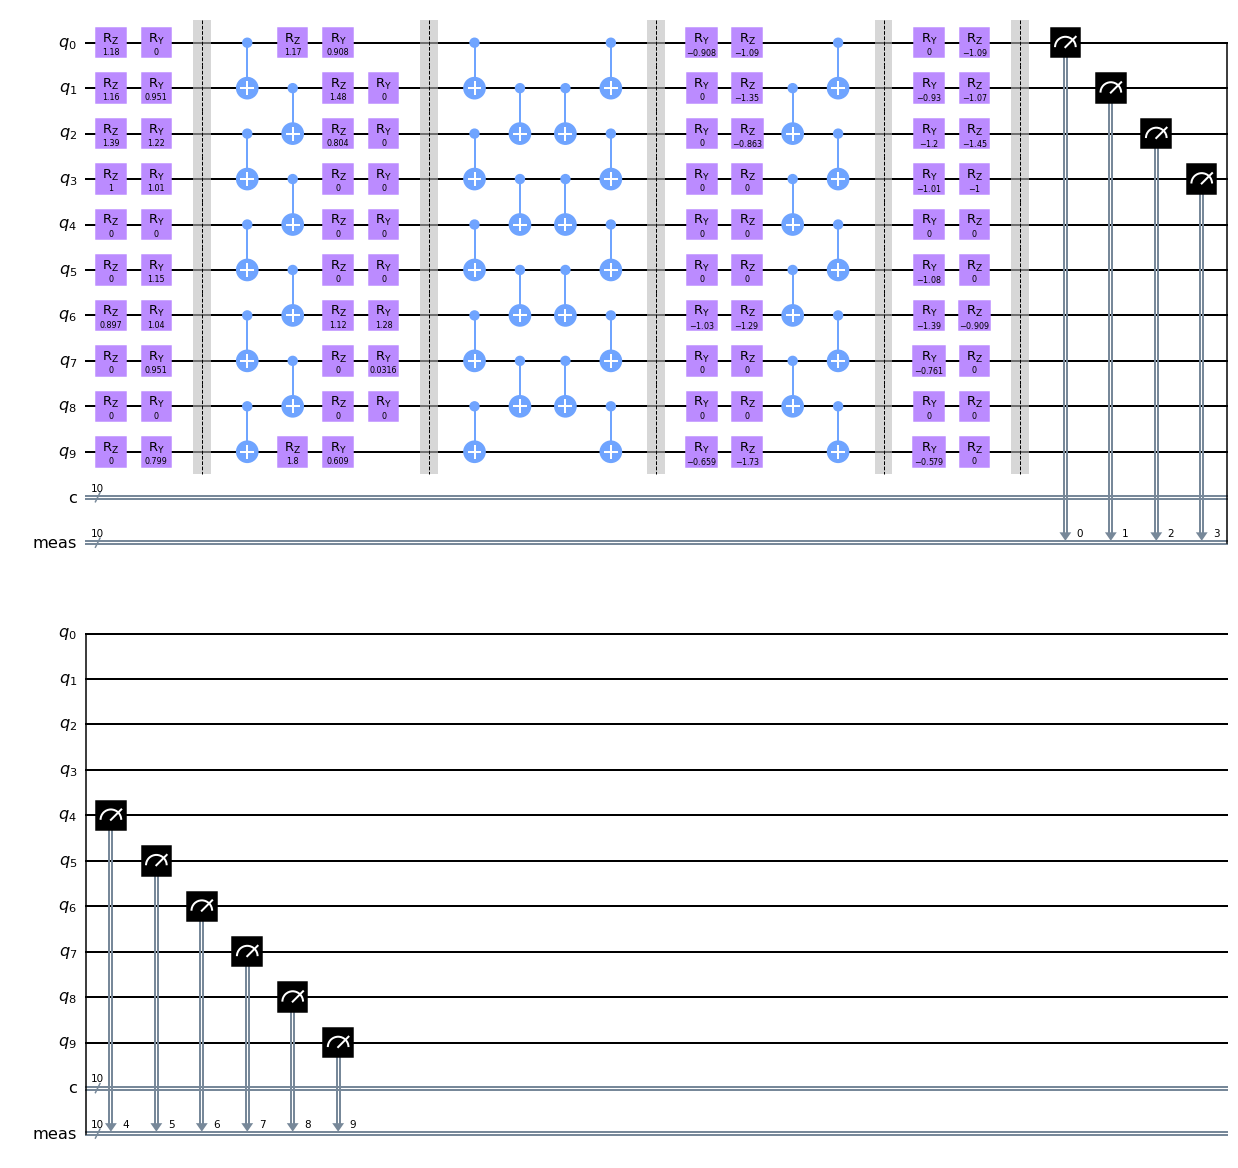

In [6]:

# this cell tries out the combined circuit constructor 
# trial_rot_array_1 = [[1,2,3,4],[5,6,7,8]]
# trial_rot_array_2 = [[1,2,3,4],[5,6,7,8]]
#qubits_trial = len(trial_rot_array_1)
#repetitions_trial = int(len(trial_rot_array_1[0])/2)
circ = qfl_combined_constructor(arr_proto1,arr_z1)
circ.draw(output="mpl", filename="cicuit.svg")


In [ ]:
# Run the circuit on the IonQ Simulator Backend 
# simulator_backend = provider.get_backend("ionq.simulator")
# job = simulator_backend.run(circ, shots=100)
# job_id = job.id()
# print("Job id", job_id)
# job_monitor(job)
# result = job.result()
# print(result)

In [ ]:
# The histogram returned by the results can be sparse, so here we add any of the missing bitstring labels.
# qubits = 2
# counts = {format(n, "03b"): 0 for n in range(2**qubits)}
# counts.update(result.get_counts(circ))
# #print(counts)
# plot_histogram(counts)

In [7]:
# Now we can run the circuit on real hardware 
qpu_backend = provider.get_backend("ionq.qpu")
# Submit the circuit to run on Azure Quantum
qpu_job = qpu_backend.run(circ, shots=1024)
job_id = qpu_job.id()
print("Job id", job_id)

# Monitor job progress and wait until complete:
job_monitor(qpu_job)


Job id 1a1fa7fa-81a5-11ec-b5d1-00155d12c206
Job Status: job has successfully run


In [8]:
# Get the job results (this method also waits for the Job to complete):
qubits = 2
result = qpu_job.result()
print(result)
counts = {format(n, "03b"): 0 for n in range(2**qubits)}
counts.update(result.get_counts(circ))
#print(counts)
plot_histogram(counts)

JSONDecodeError: Expecting value: line 1 column 2 (char 1)